In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium import plugins
from folium.plugins import HeatMap
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
restaurants_menu = pd.read_csv('/content/drive/MyDrive/MAC TERM1/Data analysis/project/UberEatsUS1/restaurant-menus.csv')
restaurants = pd.read_csv('/content/drive/MyDrive/MAC TERM1/Data analysis/project/UberEatsUS1/restaurants.csv')

In [ ]:
restaurants_menu.head()

restaurant_id           category                                 name  \
0              1  Extra Large Pizza              Extra Large Meat Lovers   
1              1  Extra Large Pizza                  Extra Large Supreme   
2              1  Extra Large Pizza                Extra Large Pepperoni   
3              1  Extra Large Pizza  Extra Large BBQ Chicken &amp; Bacon   
4              1  Extra Large Pizza                 Extra Large 5 Cheese   

  description      price  
0  Whole pie.  15.99 USD  
1  Whole pie.  15.99 USD  
2  Whole pie.  14.99 USD  
3   Whole Pie  15.99 USD  
4  Whole pie.  14.99 USD

In [ ]:
restaurants.head()

id  position                                            name  score  \
0   1        19               PJ Fresh (224 Daniel Payne Drive)    NaN   
1   2         9                  J' ti`'z Smoothie-N-Coffee Bar    NaN   
2   3         6  Philly Fresh Cheesesteaks (541-B Graymont Ave)    NaN   
3   4        17         Papa Murphy's (1580 Montgomery Highway)    NaN   
4   5       162                Nelson Brothers Cafe (17th St N)    4.7   

   ratings                                          category price_range  \
0      NaN                     Burgers, American, Sandwiches           $   
1      NaN  Coffee and Tea, Breakfast and Brunch, Bubble Tea         NaN   
2      NaN        American, Cheesesteak, Sandwiches, Alcohol           $   
3      NaN                                             Pizza           $   
4     22.0         Breakfast and Brunch, Burgers, Sandwiches         NaN   

                                        full_address zip_code        lat  \
0      224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   
1  1521 Pinson Valley Parkway, Birmingham, AL, 35217    35217  33.583640   
2          541-B Graymont Ave, Birmingham, AL, 35204    35204  33.509800   
3         1580 Montgomery Highway, Hoover, AL, 35226    35226  33.404439   
4               314 17th St N, Birmingham, AL, 35203    35203  33.514730   

         lng  
0 -86.830703  
1 -86.773330  
2 -86.854640  
3 -86.806614  
4 -86.811700

In [ ]:
# Check for missing values
restaurants.isnull().sum()
restaurants['price_range'].fillna('Unknown', inplace=True)
restaurants['score'].fillna(restaurants['score'].mean(), inplace=True)

In [ ]:
# Check for missing values in each column
restaurants.isnull().sum()

# Handling missing values for 'price_range', 'score', 'ratings', etc.
restaurants['price_range'].fillna('Unknown', inplace=True)
restaurants['score'].fillna(restaurants['score'].mean(), inplace=True)
restaurants['ratings'].fillna(0, inplace=True)
restaurants['category'].fillna('Unknown', inplace=True)


In [ ]:
# Ensure numerical columns are of the correct type
restaurants['score'] = pd.to_numeric(restaurants['score'], errors='coerce')
restaurants['ratings'] = pd.to_numeric(restaurants['ratings'], errors='coerce')

In [ ]:
# Convert 'score' and 'ratings' columns to numeric
restaurants['score'] = pd.to_numeric(restaurants['score'], errors='coerce')
restaurants['ratings'] = pd.to_numeric(restaurants['ratings'], errors='coerce')
restaurants['price_range'] = restaurants['price_range'].astype('category')
restaurants['category'].fillna('Unknown', inplace=True)
restaurants['category'] = restaurants['category'].astype('category')


In [ ]:
# Remove any duplicates based on restaurant id or name
restaurants_menu.drop_duplicates(subset='restaurant_id', keep='first', inplace=True)

In [ ]:
restaurants.describe()

id      position         score       ratings           lat  \
count  63469.000000  63469.000000  63469.000000  63469.000000  63469.000000   
mean   31735.000000     86.692102      4.551431     41.652823     36.585019   
std    18322.066455     79.280129      0.224240     64.030548      6.458959   
min        1.000000      1.000000      1.300000      0.000000      0.000000   
25%    15868.000000     18.000000      4.551431      0.000000     30.442221   
50%    31735.000000     61.000000      4.551431     15.000000     34.707265   
75%    47602.000000    141.000000      4.600000     59.000000     40.884903   
max    63469.000000    300.000000      5.000000    500.000000     48.963950   

                lng  
count  63469.000000  
mean     -96.715114  
std       14.438166  
min     -123.841240  
25%      -98.569760  
50%      -96.764330  
75%      -87.938729  
max        0.000000

In [ ]:
# Show unique values in categorical columns
restaurants['price_range'].unique()
restaurants['category'].unique()

['Burgers, American, Sandwiches', 'Coffee and Tea, Breakfast and Brunch, Bubble ..., 'American, Cheesesteak, Sandwiches, Alcohol', 'Pizza', 'Breakfast and Brunch, Burgers, Sandwiches', ..., 'Pizza, American, Italian, Wings, Sandwich, Sa..., 'Coffee &amp; Tea, Breakfast and Brunch, Bakery', 'Cupcakes, Desserts, Bakery', 'Sandwich, Italian, Pizza', 'Convenience, Snacks, Alcohol, Everyday Essent...]
Length: 15575
Categories (15575, object): ['*New, Tacos, Tex Mex', 'AAPI-owned, Convenience, Alcohol, Liquor Stores',
                             'Adult, Alcohol, Beer, Wine', 'Adult, Alcohol, Liquor Stores', ...,
                             'wings, Sandwich, Burgers, Family Friendly', 'wings, Sandwich, Chicken',
                             'wings, Sandwich, Salads, Healthy', 'wings, pizza']

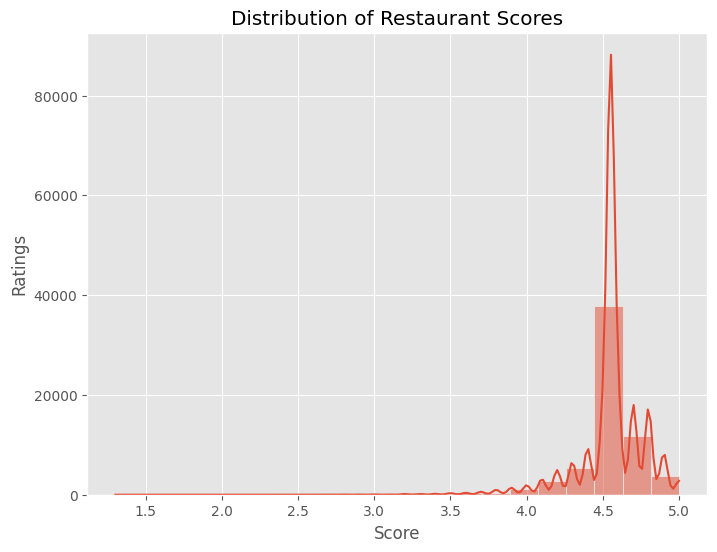

In [ ]:
#Visualizations:
# Distribution of restaurant Score
plt.figure(figsize=(8, 6))
sns.histplot(restaurants['score'], bins=20, kde=True)
plt.title('Distribution of Restaurant Scores')
plt.xlabel('Score')
plt.ylabel('Ratings')
plt.show()

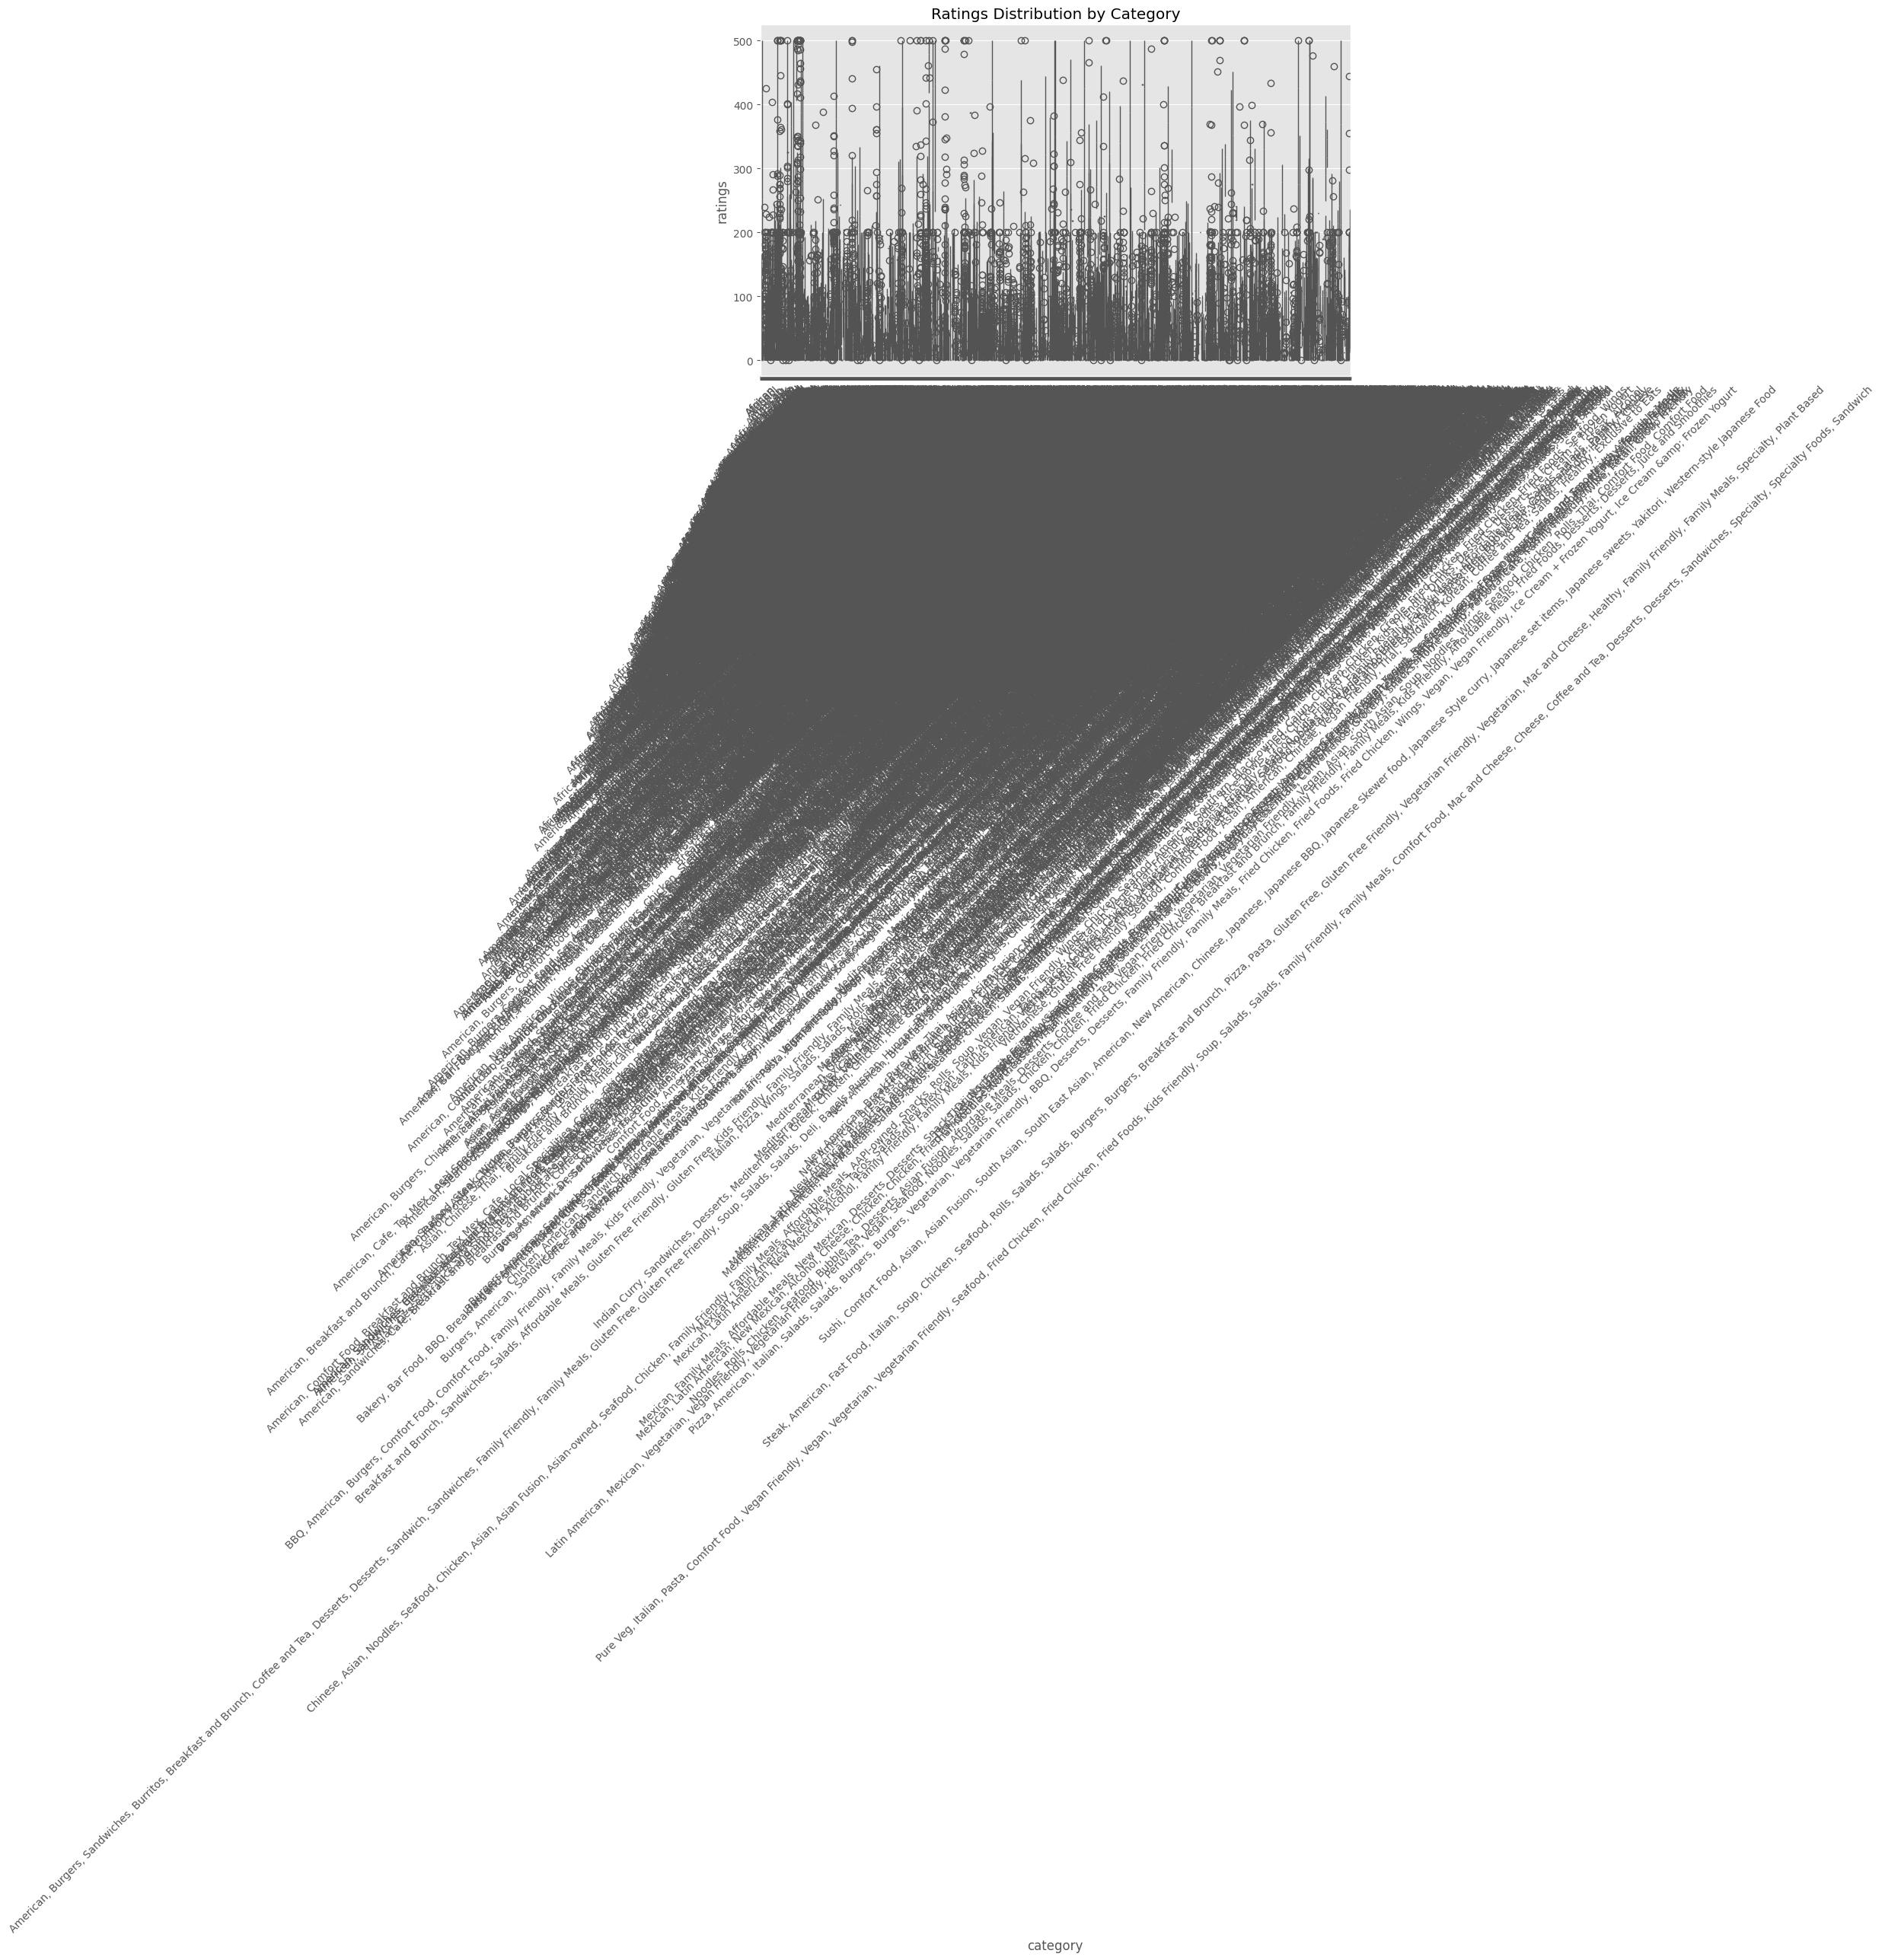

In [ ]:
# Boxplot of ratings distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='ratings', data=restaurants)
plt.title('Ratings Distribution by Category')
plt.xticks(rotation=45)
plt.show()

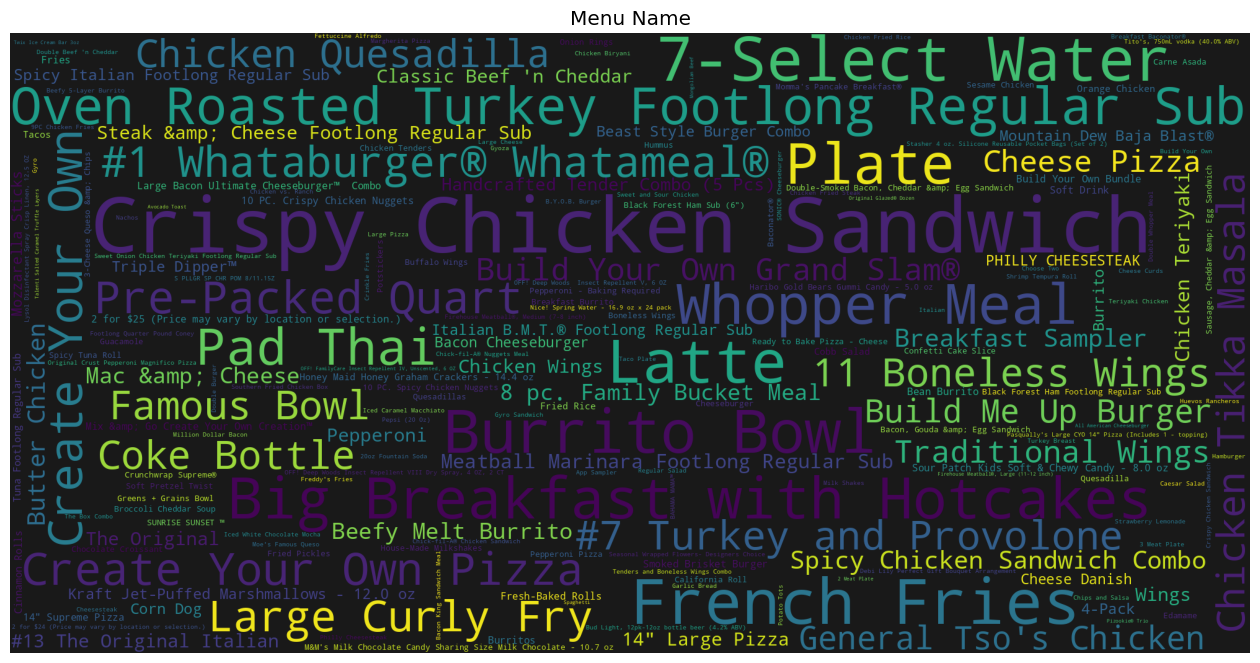

In [ ]:
plt.figure(figsize=(16,10))
data = restaurants_menu['name'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='#191919').generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Menu Name')
plt.axis('off')
plt.show()

In [ ]:
freefood = restaurants_menu[restaurants_menu.price == '0.0 USD']
paidfood = restaurants_menu[restaurants_menu.price != '0.0 USD']

print("Free Food : ",len(freefood))
print("Paid Food : ",len(paidfood))

Free Food :  846
Paid Food :  62463


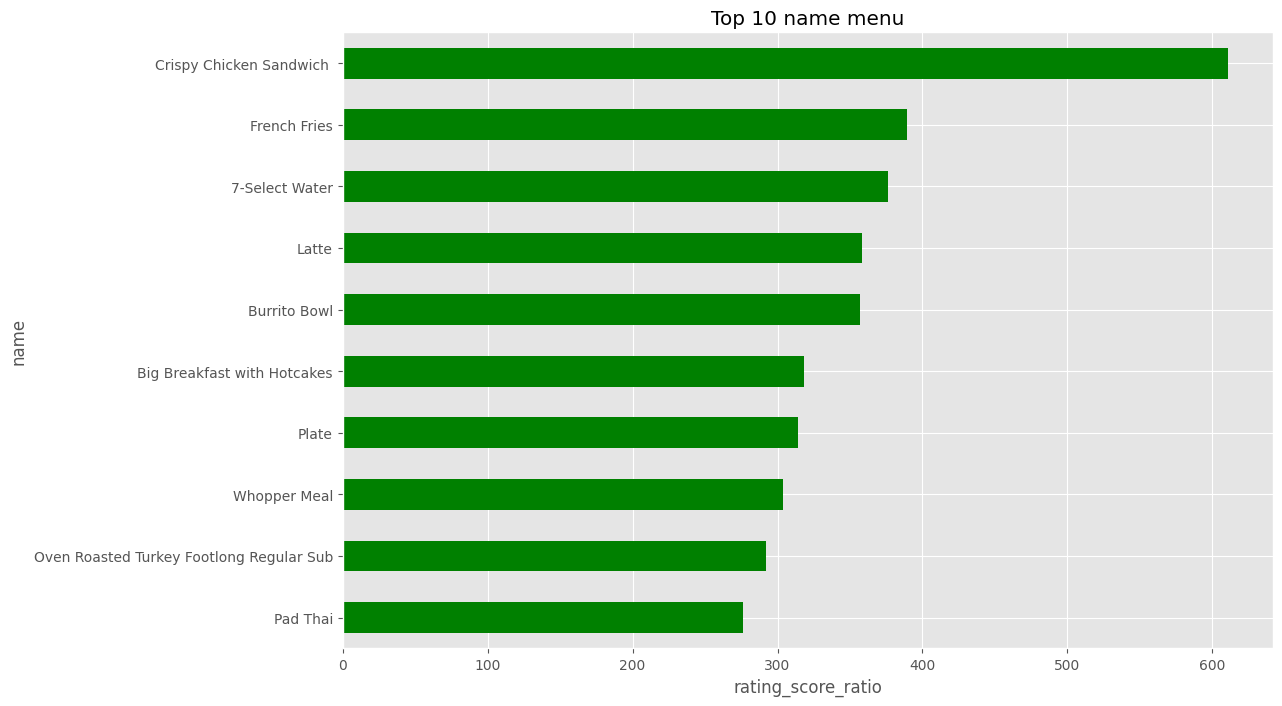

In [ ]:
plt.figure(figsize=(12,8))
ax = restaurants_menu['name'].value_counts().iloc[:10].plot(kind="barh", color = 'green')
ax.invert_yaxis()
ax.set_xlabel('rating_score_ratio')
ax.title.set_text('Top 10 name menu')

In [ ]:
#Merging 2 dataset for getting better insigths
restaurant_merge = pd.merge(restaurants, restaurants_menu, left_on='id', right_on='restaurant_id')
restaurant_merge.head()

id  position                                          name_x     score  \
0   1        19               PJ Fresh (224 Daniel Payne Drive)  4.551431   
1   2         9                  J' ti`'z Smoothie-N-Coffee Bar  4.551431   
2   3         6  Philly Fresh Cheesesteaks (541-B Graymont Ave)  4.551431   
3   4        17         Papa Murphy's (1580 Montgomery Highway)  4.551431   
4   5       162                Nelson Brothers Cafe (17th St N)  4.700000   

   ratings                                        category_x price_range  \
0      0.0                     Burgers, American, Sandwiches           $   
1      0.0  Coffee and Tea, Breakfast and Brunch, Bubble Tea     Unknown   
2      0.0        American, Cheesesteak, Sandwiches, Alcohol           $   
3      0.0                                             Pizza           $   
4     22.0         Breakfast and Brunch, Burgers, Sandwiches     Unknown   

                                        full_address zip_code        lat  \
0      224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   
1  1521 Pinson Valley Parkway, Birmingham, AL, 35217    35217  33.583640   
2          541-B Graymont Ave, Birmingham, AL, 35204    35204  33.509800   
3         1580 Montgomery Highway, Hoover, AL, 35226    35226  33.404439   
4               314 17th St N, Birmingham, AL, 35203    35203  33.514730   

         lng  restaurant_id  \
0 -86.830703              1   
1 -86.773330              2   
2 -86.854640              3   
3 -86.806614              4   
4 -86.811700              5   

                                          category_y  \
0                                  Extra Large Pizza   
1                                          Smoothies   
2                                     Picked for you   
3  New! Crustless Pizzas - Keto Friendly (Baking ...   
4                                     Picked for you   

                                              name_y  \
0                            Extra Large Meat Lovers   
1                                  J’ Ti`’z Smoothie   
2                    Chicken Bacon Ranch Cheesesteak   
3  Chicken Bacon Artichoke - Keto Friendly (Bakin...   
4                    Pork Chop Rice with Gravy Plate   

                                         description      price  
0                                         Whole pie.  15.99 USD  
1  Tropical fruit blend, dragon fruit mix, mango,...   5.49 USD  
2  Chicken sandwich with bacon, ranch, and your c...  14.38 USD  
3  Creamy Garlic Sauce, Whole-Milk Mozzarella, Gr...  10.99 USD  
4                                                NaN    7.0 USD

In [ ]:
bestmenu = restaurant_merge.groupby('name_y').count().sort_values(by = 'id', ascending=False).head(20)
bestmenu

id  position  name_x  score  \
name_y                                                                   
Crispy Chicken Sandwich                   611       611     611    611   
French Fries                              389       389     389    389   
7-Select Water                            376       376     376    376   
Latte                                     358       358     358    358   
Burrito Bowl                              357       357     357    357   
Big Breakfast with Hotcakes               318       318     318    318   
Plate                                     314       314     314    314   
Whopper Meal                              304       304     304    304   
Oven Roasted Turkey Footlong Regular Sub  292       292     292    292   
Pad Thai                                  276       276     276    276   
Create Your Own                           233       233     233    233   
Create Your Own Pizza                     221       221     221    221   
Pre-Packed Quart                          218       218     218    218   
Large Curly Fry                           201       201     201    201   
#1 Whataburger® Whatameal®                199       199     199    199   
#7 Turkey and Provolone                   178       178     178    178   
Famous Bowl                               176       176     176    176   
Coke Bottle                               169       169     169    169   
11 Boneless Wings                         167       167     167    167   
Chicken Quesadilla                        162       162     162    162   

                                          ratings  category_x  price_range  \
name_y                                                                       
Crispy Chicken Sandwich                       611         611          611   
French Fries                                  389         389          389   
7-Select Water                                376         376          376   
Latte                                         358         358          358   
Burrito Bowl                                  357         357          357   
Big Breakfast with Hotcakes                   318         318          318   
Plate                                         314         314          314   
Whopper Meal                                  304         304          304   
Oven Roasted Turkey Footlong Regular Sub      292         292          292   
Pad Thai                                      276         276          276   
Create Your Own                               233         233          233   
Create Your Own Pizza                         221         221          221   
Pre-Packed Quart                              218         218          218   
Large Curly Fry                               201         201          201   
#1 Whataburger® Whatameal®                    199         199          199   
#7 Turkey and Provolone                       178         178          178   
Famous Bowl                                   176         176          176   
Coke Bottle                                   169         169          169   
11 Boneless Wings                             167         167          167   
Chicken Quesadilla                            162         162          162   

                                          full_address  zip_code  lat  lng  \
name_y                                                                       
Crispy Chicken Sandwich                            609       609  611  611   
French Fries                                       381       381  389  389   
7-Select Water                                     376       376  376  376   
Latte                                              357       357  358  358   
Burrito Bowl                                       357       357  357  357   
Big Breakfast with Hotcakes                        318       318  318  318   
Plate                                              314       314  314  31

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Create a pivot table
pivot = bestmenu.pivot_table(index='name_y', columns='restaurant_id', values='id', aggfunc='count')
pivot_filled = pivot.fillna(0)

# Apply Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=5)
svd_matrix = svd.fit_transform(pivot_filled)

# Calculate similarity between items (restaurants)
item_similarity = cosine_similarity(svd_matrix)

# Convert similarity matrix to DataFrame
item_similarity_df = pd.DataFrame(item_similarity, index=pivot_filled.index, columns=pivot_filled.index)

# Show the top similar restaurants for a given restaurant
item_similarity_df.iloc[:, 0].sort_values(ascending=False).head(10)

name_y
#1 Whataburger® Whatameal®                  1.000000
Latte                                       0.749184
7-Select Water                              0.744304
Large Curly Fry                             0.733212
Big Breakfast with Hotcakes                 0.603980
Whopper Meal                                0.396795
Famous Bowl                                 0.254629
Create Your Own Pizza                       0.196702
Oven Roasted Turkey Footlong Regular Sub    0.171821
Pre-Packed Quart                            0.130484
Name: #1 Whataburger® Whatameal®, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

# Load your data and create dataframes for actual and predicted ratings
actual_ratings = pd.DataFrame({'rating_column': [1, 2, 3, 4, 5]})
predicted_ratings = pd.DataFrame({'rating_column': [1.2, 2.1, 2.9, 4.1, 4.8]})

# Extract rating columns from the dataframes
actual_ratings = actual_ratings['rating_column'].values
predicted_ratings = predicted_ratings['rating_column'].values

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(actual_ratings, predicted_ratings)

# Calculate RMSE (Root Mean Squared Error) manually
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3f}')

RMSE: 0.148


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

# 1. Define your data
# Replace these with your actual data
num_users = 100
num_items = 50
num_samples = 1000

# Generating synthetic data for demonstration
user_ids = np.random.randint(0, num_users, size=(num_samples,))
item_ids = np.random.randint(0, num_items, size=(num_samples,))
ratings = np.random.uniform(1, 5, size=(num_samples,)) 5

# 2. Build the model
user_input = layers.Input(shape=(1,), name="user_input")
item_input = layers.Input(shape=(1,), name="item_input")

# Embedding layers for users and items
user_embedding = layers.Embedding(input_dim=num_users, output_dim=50, name="user_embedding")(user_input)
item_embedding = layers.Embedding(input_dim=num_items, output_dim=50, name="item_embedding")(item_input)

# Compute dot product between user and item embeddings
dot_product = layers.Dot(axes=1)([user_embedding, item_embedding])

# Dense layer to output final rating prediction
output = layers.Dense(1)(dot_product)

# Define and compile the model
model = Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Train the model
model.fit([user_ids, item_ids], ratings, epochs=10, batch_size=32)

# 4. Evaluate the model (optional)
loss = model.evaluate([user_ids, item_ids], ratings)
print(f"Final Loss: {loss}")

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.7297
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9862 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7210
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5034
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7305
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5897
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7171
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8129
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6272
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8238
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4991
Final Loss: 1.5205161571502686


In [ ]:
!pip install squarify

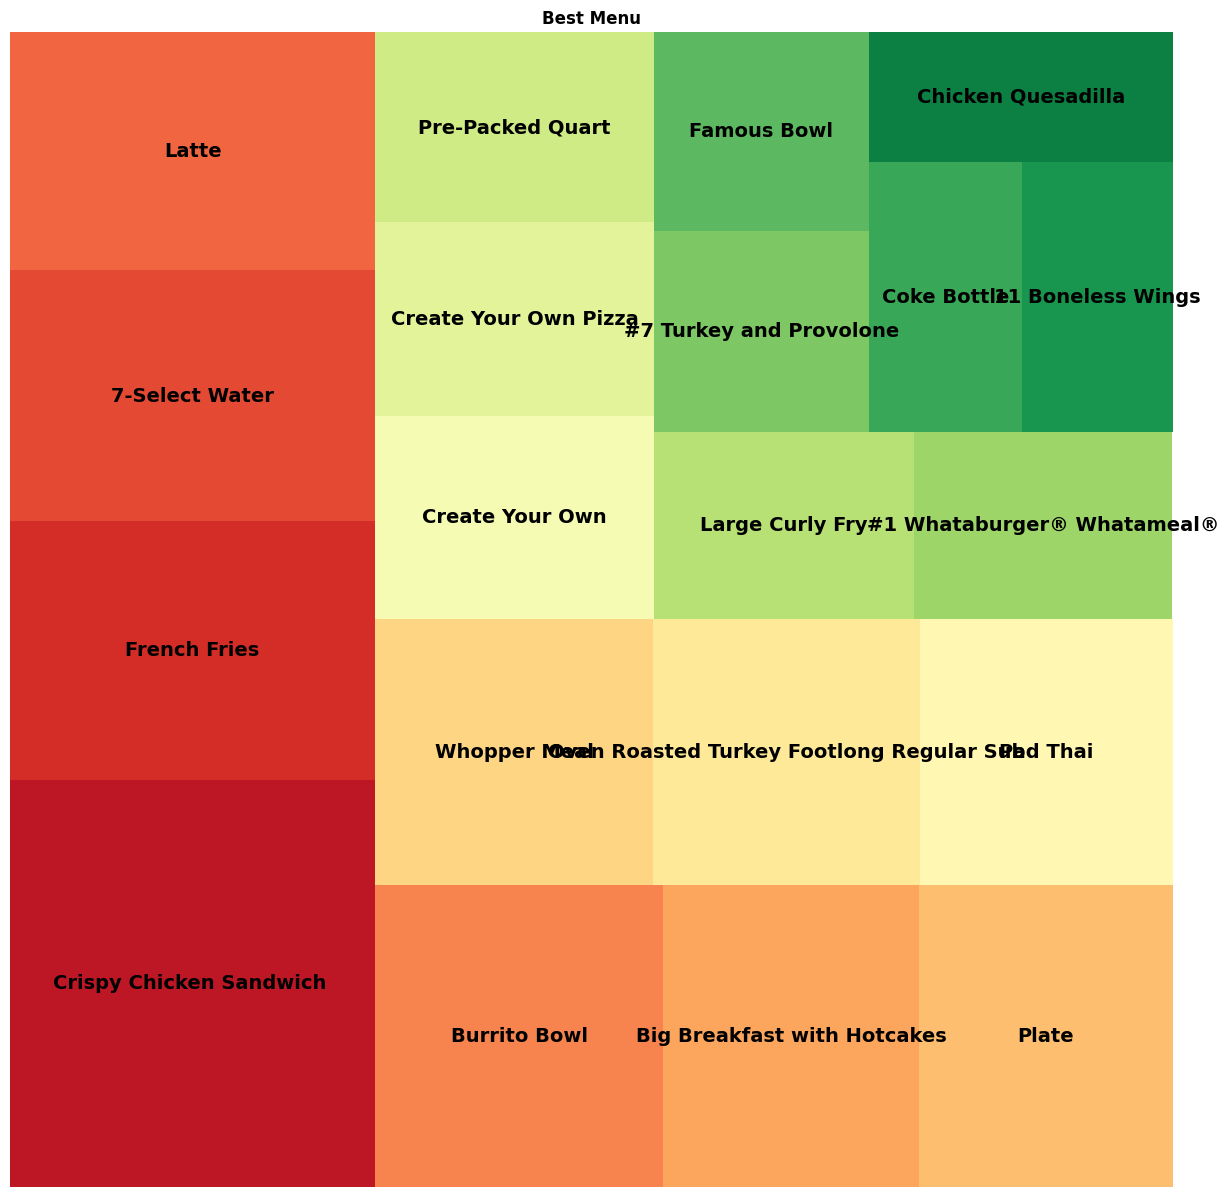

In [ ]:
from matplotlib import gridspec
import squarify

y = bestmenu
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.id, label = y.index, color=sns.color_palette("RdYlGn", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Best Menu', position=(0.5, 1.0+0.03), fontsize = 12, fontweight='bold')
plt.axis('off')
plt.show()

In [ ]:
print(restaurants.columns)

# Check if column exists with possible names by replacing 'alternative_column_name'
if 'alternative_column_name' in restaurants.columns:
    restaurants = restaurants.rename(columns={'alternative_column_name': 'price_range'})
    restaurants.price_range.unique()
else:
    print("Column not found, please ensure that your data contains 'price_range' with the correct data type.")


Index(['id', 'position', 'name', 'score', 'ratings', 'category', 'price_range',
       'full_address', 'zip_code', 'lat', 'lng'],
      dtype='object')
Column not found, please ensure that your data contains 'price_range' with the correct data type.


In [ ]:
restaurants.price_range.unique()

['$', 'Unknown', '$$', '$$$', '$$$$', '$$$$$$$$$$$$$$$$$']
Categories (6, object): ['$', '$$', '$$$', '$$$$', '$$$$$$$$$$$$$$$$$', 'Unknown']

In [ ]:
plt.figure(figsize=(10,6))
print('$ = Inexpensive:',len(restaurants[restaurants.price_range == '$']))
print('$$ = Moderately Expensive:',len(restaurants[restaurants.price_range == '$$']))
print('$$$ = Expensive:',len(restaurants[restaurants.price_range == '$$$']))
print('$$$$ = Very Expensive:',len(restaurants[restaurants.price_range == '$$$$']))

$ = Inexpensive: 37637
$$ = Moderately Expensive: 14952
$$$ = Expensive: 237
$$$$ = Very Expensive: 25


<Figure size 1000x600 with 0 Axes>

In [ ]:
fig = px.pie(restaurants, names='price_range',title='Population of Price Range in Menus', template = 'plotly_dark')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide',showlegend=True)

def newLegend(fig, newNames):
    for item in newNames:
        for i, elem in enumerate(fig.data[0].labels):
            if elem == item:
                fig.data[0].labels[i] = newNames[item]
    return(fig)

fig = newLegend(fig = fig, newNames = {'$':'Inexpensive',
                                       '$$' : 'Moderately Expensive',
                                      '$$$' : 'Expensive',
                                      '$$$$' : 'Very Expensive'})


fig.show()

In [ ]:
restaurants.score.unique()

array([4.55143051, 4.7       , 4.6       , 5.        , 4.9       ,
       3.7       , 4.8       , 4.3       , 4.4       , 4.1       ,
       4.5       , 4.2       , 4.        , 3.8       , 3.9       ,
       3.5       , 3.2       , 3.6       , 3.        , 3.4       ,
       3.3       , 3.1       , 2.2       , 2.7       , 2.9       ,
       2.4       , 2.8       , 2.6       , 2.5       , 2.1       ,
       1.9       , 2.        , 2.3       , 1.3       ])

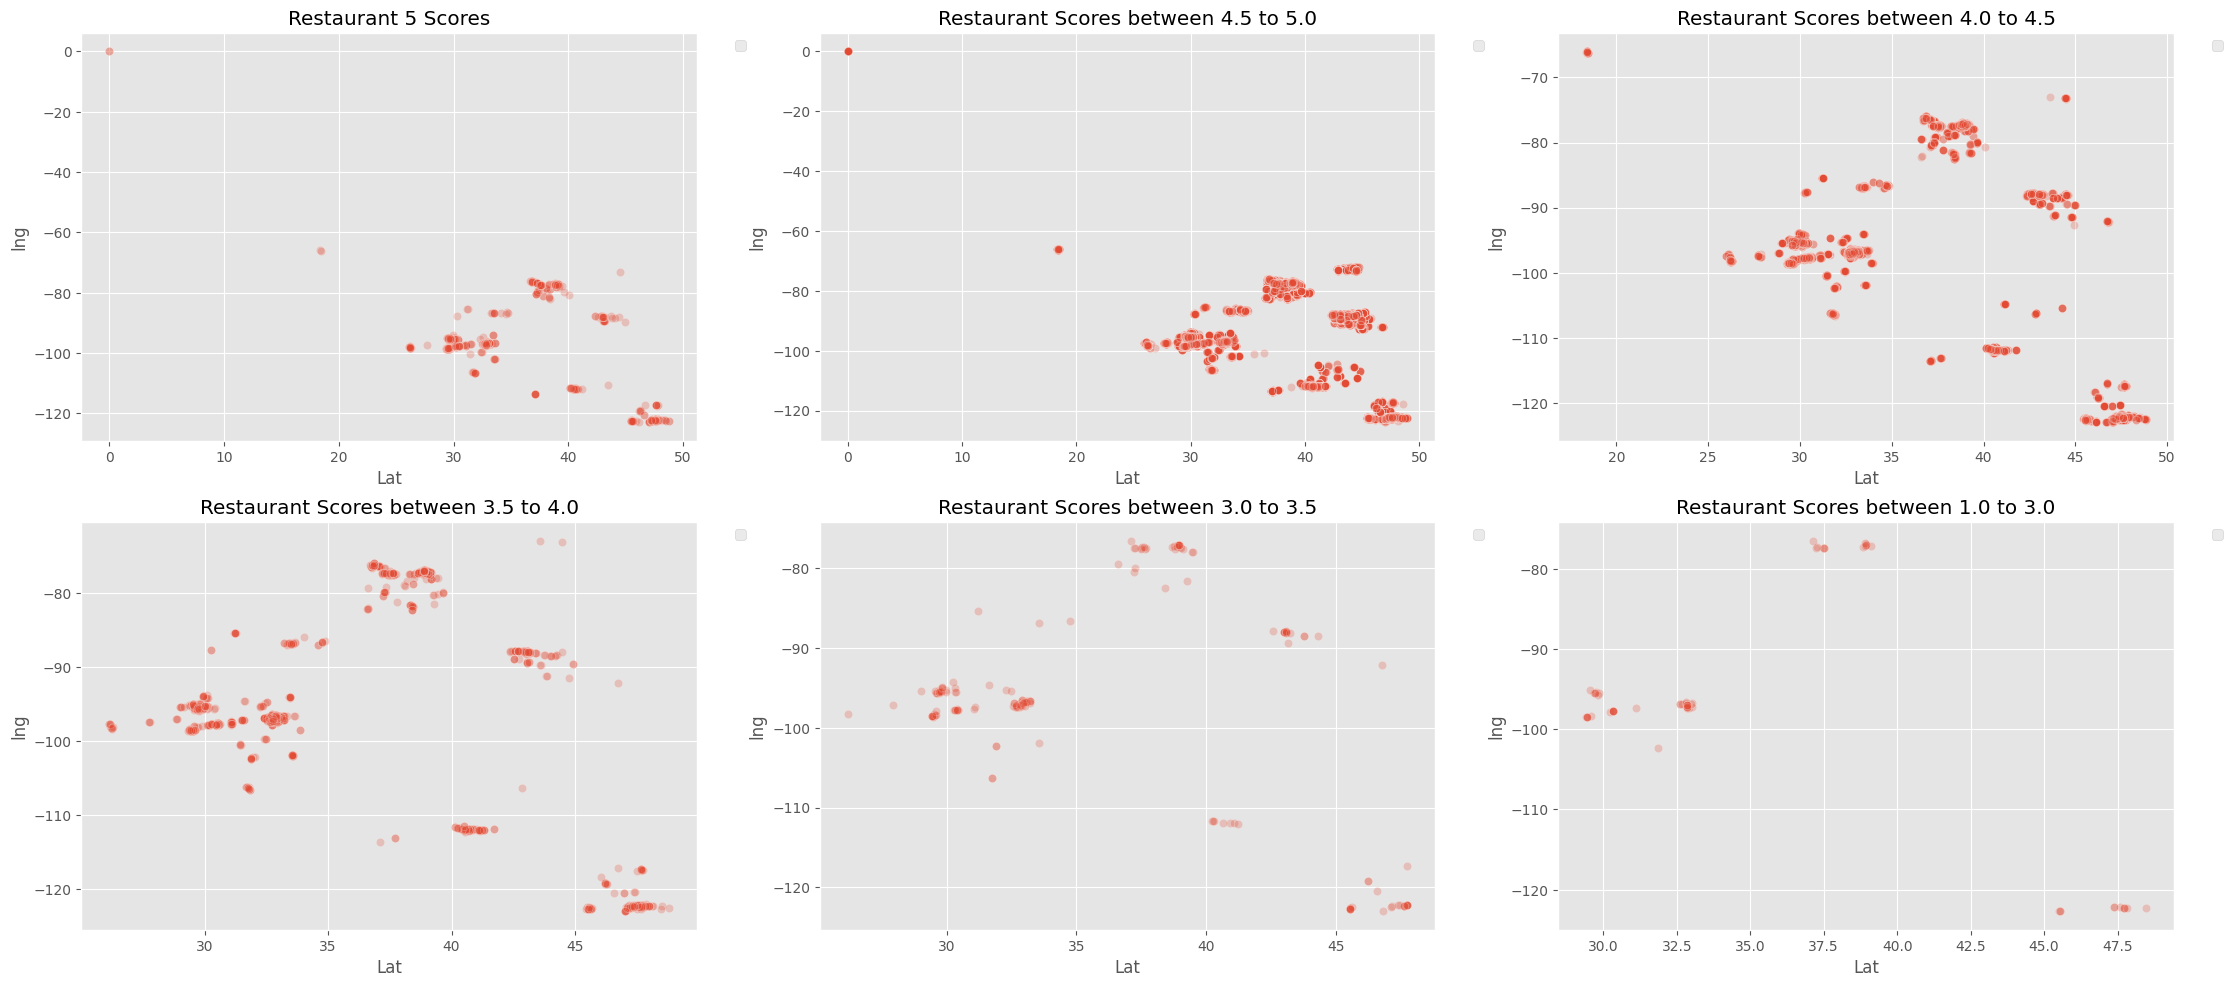

In [ ]:
popular_restaurant = restaurants.sort_values(['score','ratings'], ascending=False)
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(3,3,1)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant 5 Scores')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[popular_restaurant.score == 5.0], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,2)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 4.5 to 5.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 4.5) & (popular_restaurant.score < 5.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,3)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 4.0 to 4.5')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 4.0) & (popular_restaurant.score < 4.5)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,4)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 3.5 to 4.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 3.5) & (popular_restaurant.score < 4.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,5)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 3.0 to 3.5')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 3.0) & (popular_restaurant.score < 3.5)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,6)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 1.0 to 3.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 1.0) & (popular_restaurant.score < 3.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
df_new = popular_restaurant.dropna()

In [ ]:
df_new = df_new[(df_new.lat.notnull())]
df_new = df_new[(df_new.lat != -1) & (df_new.lng != -1)]
df_new = df_new[~df_new.lat.isna()]

In [ ]:
places = []

map_offenses = folium.Map(location=[37.09024,-95.712891], zoom_start=4.3)
for i, loc in df_new.iterrows():
    places.append((loc['lat'], loc['lng']))

In [ ]:
map_offenses.add_children(plugins.HeatMap(places, radius=18))

In [ ]:
fivestar=df_new.loc[(df_new['score'] == 5.0)]['full_address'].value_counts()
fivestar

full_address
21919 66th Ave W, Mountlake Terrace, WA, 98043    2
2714 E Cesar Chavez, Austin, TX, 78702            2
1542 Bandera Road, San Antonio, TX, 78228         1
909 E 2100 S, Salt Lake City, UT, 84105           1
13802 Embassy Row, San Antonio, TX, 78216         1
                                                 ..
9025 SPENCER HWY, DEER PARK, TX, 77536            1
930 East Campbell Road, Richardson, TX, 75081     1
16310 Rr 620, Round Rock, TX, 78681               1
4619 Village Terrace Dr NE, Seattle, WA, 98105    1
3641 Colonial Avenue, Dallas, TX, 75215           1
Name: count, Length: 920, dtype: int64

In [ ]:
# Make an empty map
m = folium.Map(location=[37.09024,-95.712891], tiles="OpenStreetMap", zoom_start=4.2)

# Show the map
m
# add marker one by one on the map
for i in range(0,len(fivestar)):
   folium.Marker(
      location=[df_new.iloc[i]['lat'], df_new.iloc[i]['lng']],
      popup=df_new.iloc[i]['full_address'],
       icon=folium.Icon(color="red", icon="glyphicon-cutlery"),
   ).add_to(m)

# Show the map again
m